In [1]:
import math
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from sympy.abc import beta
from scipy.integrate import quad
from scipy.special import gamma
from sympy import I

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [170]:
c1, c2, c3, cb = 10e-9, 10e-9, 22e-9, 22e-8

l, lch = 1e-6, 100e-6

x = 5000
r1, r2, r3, rl, rch = x, 1e4-x, 370.0, 2.0 , 12.0

Is = 5e-13
vs = 9.0
vt = .025
b  = 50
alpha = b/(b+1)

def f1(vc1, vc2, vc3, vcb, il, ich):
    f1 = (1/c1)*(ich-alpha*ie(vc2, vc3, vcb)-il)
    return f1

def f2(vc1, vc2, vc3, vcb, il, ich):
    f2 = (1/c2)*(vs/r1-(vcb+vc2)*(1/r1+1/r2)-(ie(vc2, vc3, vcb)/(b+1))+il)
    return f2

def f3(vc1, vc2, vc3, vcb, il, ich):
    f3 = (1/c3)*(ie(vc2, vc3, vcb)-vc3/r3)
    return f3

def f4(vc1, vc2, vc3, vcb, il, ich):
    f4 = (1/cb)*(vs/r1 - (vcb+vc2)*(1/r1+1/r2)-(ie(vc2, vc3, vcb)/(b+1)))
    return f4

def f5(vc1, vc2, vc3, vcb, il, ich):
    f5 = (1/l)*(vc1-vc2-il*rl)
    return f5

def f6(vc1, vc2, vc3, vcb, il, ich):
    f6 = (1/lch)*(vs-vc1-rch*ich)
    return f6

def ie(vc2, vc3, vcb):
    ie = Is*(math.exp((vcb+vc2-vc3)/vt)-1)
    return ie

In [171]:
#Halley's method
delta = (r1**2*r2/2 + r1*r2**2 + r1*r2*rch + r2**2*rch)/(r1**2*r2 + r1**2*rch + r1*r2**2 + 2*r1*r2*rch + r2**2*rch)
epsilon = -1*((-r1**2*r2**2/(2*(b + 1)) - r1**2*r2*r3 - r1**2*r2*rch/2 - r1**2*r2*rch/(2*(b + 1)) - r1**2*r3*rch - r1*r2**2*r3 - r1*r2**2*rch/2 - r1*r2**2*rch/(2*(b + 1)) - 2*r1*r2*r3*rch - r2**2*r3*rch)/(r1**2*r2 + r1**2*rch + r1*r2**2 + 2*r1*r2*rch + r2**2*rch))
(delta*vs+epsilon*Is)/vt
delta
epsilon*Is
z1 = (epsilon/vt)*np.exp((delta*vs+epsilon*Is)/vt)

def lambert(z): 
    x = range(500)
    w = 1
    for i in x:
        w = w - (w*math.exp(w) - z)/(math.exp(w)*(w+1)-((w+2)*(w*math.exp(w) - z))/(2*w+2))
    return w

W = lambert(z1)

Ie = W*vt/epsilon - Is
Ie

vc20 = 0
vc30 = Ie*r3
vbe0 = delta*vs-epsilon*Ie
vcb0 = vbe0 + vc30 - vc20

w0 = np.sqrt((1/l)*((c1+c2)/(c1*c2)))

x0 = [0,0,vc30,vcb0,0,0,Ie]
x0
vbe0

269.57006370227714

0.7488057324840764

2.002405707505932e-10

0.01708194024866487

[0, 0, 6.320317892006002, 6.218574554522322, 0, 0, 0.01708194024866487]

-0.10174333748368003

In [172]:
def RK(t, h, x0):

    f = [f1, f2, f3, f4, f5, f6] #FUNCTIONS AS DEFINED ABOVE
    
    k1 = [0,0,0,0,0,0,0] #THESE HOLD THE STATE VARIABLE VALUES FOR EACH STEP
    k2 = [0,0,0,0,0,0,0]
    k3 = [0,0,0,0,0,0,0]
    k4 = [0,0,0,0,0,0,0]
    
    x1 = [x0[0]] #STATE VARIABLE ARRAYS
    x2 = [x0[1]]
    x3 = [x0[2]]
    x4 = [x0[3]]
    x5 = [x0[4]]
    x6 = [x0[5]]

    p = 0 #COUNTER VARIABLES
    q = 0
    
    for i in t:
        
        for j in f:
            k1[q] = j(x1[p], x2[p], x3[p], x4[p], x5[p], x6[p])
            q+=1
        q = 0
        for j in f:
            k2[q] = j(x1[p]+(h/2)*k1[0], x2[p]+(h/2)*k1[1], x3[p]+(h/2)*k1[2], x4[p]+(h/2)*k1[3], x5[p]+(h/2)*k1[4], x6[p]+(h/2)*k1[5])
            q+=1
        q = 0
        k2
        for j in f:
            k3[q] = j(x1[p]+(h/2)*k2[0], x2[p]+(h/2)*k2[1], x3[p]+(h/2)*k2[2], x4[p]+(h/2)*k2[3], x5[p]+(h/2)*k2[4], x6[p]+(h/2)*k2[5])
            q+=1
        q = 0
        for j in f:
            k4[q] = j(x1[p]+h*k3[0], x2[p]+h*k3[1], x3[p]+h*k3[2], x4[p]+h*k3[3], x5[p]+h*k3[4], x6[p]+h*k3[5])
            q+=1
        q = 0
        if p==len(t)-1: break
        
        x1.append(x1[p]+(h/6)*(k1[0]+2*k2[0]+2*k3[0]+k4[0]))
        x2.append(x2[p]+(h/6)*(k1[1]+2*k2[1]+2*k3[1]+k4[1]))
        x3.append(x3[p]+(h/6)*(k1[2]+2*k2[2]+2*k3[2]+k4[2]))
        x4.append(x4[p]+(h/6)*(k1[3]+2*k2[3]+2*k3[3]+k4[3]))
        x5.append(x5[p]+(h/6)*(k1[4]+2*k2[4]+2*k3[4]+k4[4]))
        x6.append(x6[p]+(h/6)*(k1[5]+2*k2[5]+2*k3[5]+k4[5]))
        
        p+=1
    return x1, x2, x3, x4, x5, x6

In [175]:
h = 0.0000000005
t = np.arange(0, 0.0001, h)
gah = RK(t, h, x0)

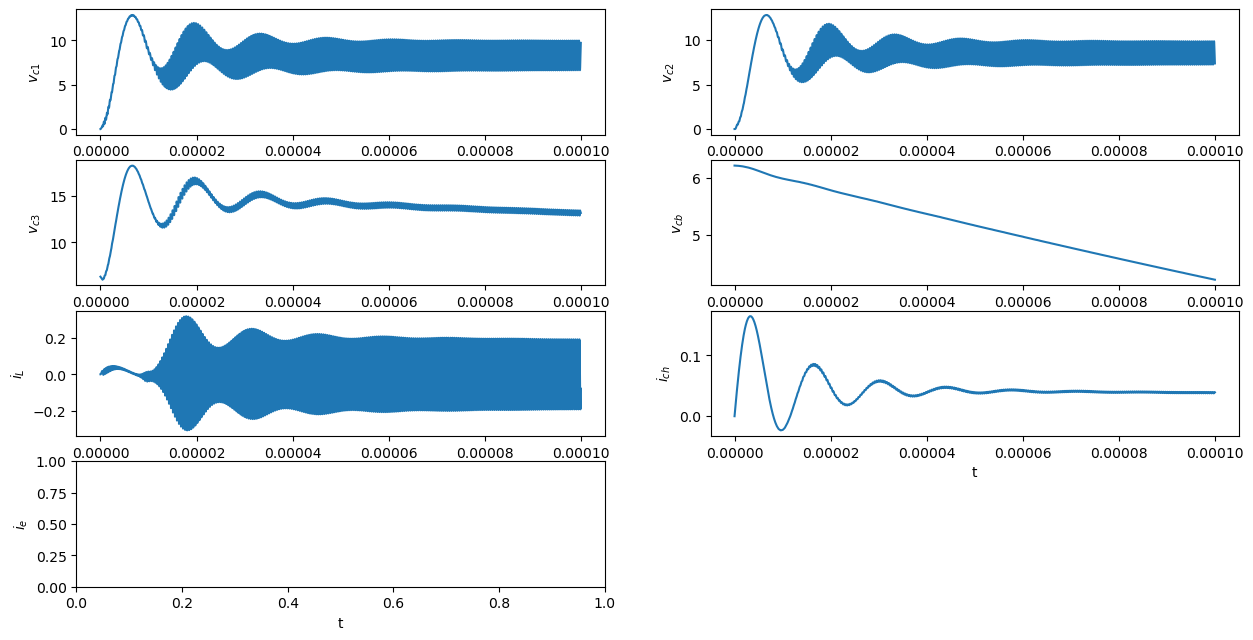

In [176]:
fig = plt.figure(figsize=(15,7.5))

ax0 = fig.add_subplot(4, 2, 1, xlabel='t', ylabel='$v_{c1}$')
ax0.plot(t, gah[0])

ax1 = fig.add_subplot(4, 2, 2, xlabel='t', ylabel='$v_{c2}$',)
ax1.plot(t, gah[1])

ax2 = fig.add_subplot(4, 2, 3, xlabel='t', ylabel='$v_{c3}$',)
ax2.plot(t, gah[2])

ax3 = fig.add_subplot(4, 2, 4, xlabel='t', ylabel='$v_{cb}$',)
ax3.plot(t, gah[3])

ax4 = fig.add_subplot(4, 2, 5, xlabel='t', ylabel='$i_L$',)
ax4.plot(t, gah[4])

ax5 = fig.add_subplot(4, 2, 6, xlabel='t', ylabel='$i_{ch}$',)
ax5.plot(t, gah[5])

ax5 = fig.add_subplot(4, 2, 7, xlabel='t', ylabel='$i_{e}$',)
#ax5.plot(t, gah[6])

In [177]:
ir1, ir2, ir3, irch = sym.symbols('ir1, ir2, ir3, irch')
r1, r2, r3, rch, b, vbe, g, Vs = sym.symbols('r1, r2, r3, rch, b, vbe, g, Vs')

In [178]:
f1 = g*ir3+ir2-ir1
f2 = ir1*r1+ir2*r2-Vs
f3 = vbe+ir3*r3-ir2*r2
f4 = ir2+ir3-ir1-irch
f5 = irch*rch- (Vs-irch*rch-(ir2*r2-ir3*r3)-ir3*r3) -ir1*r1

In [179]:
g4 = sym.solve(f4, irch)
g5 = sym.solve(f5, irch)
g4[0]
g4 = g4[0] - g5[0]
g2 = sym.solve(f2, ir1)
g2
g4 = sym.solve(g4, ir1)
g4 = g4[0] - g2[0]
g4
g1 = sym.solve(f1, ir1)
g1 = g2[0] - g1[0]
g1

-ir1 + ir2 + ir3

[(Vs - ir2*r2)/r1]

(-Vs + ir2*r2 + 2*ir2*rch + 2*ir3*rch)/(r1 + 2*rch) - (Vs - ir2*r2)/r1

-g*ir3 - ir2 + (Vs - ir2*r2)/r1

In [180]:
g4 = sym.solve(g4, ir2)
g1 = sym.solve(g1, ir2)
g1 = (g4[0]+g1[0])/2
g1  ### = ir2

(Vs - g*ir3*r1)/(2*(r1 + r2)) + (Vs*r1 + Vs*rch - ir3*r1*rch)/(2*(r1*r2 + r1*rch + r2*rch))

In [181]:
g3 = sym.solve(f3, ir2)
g3 = g1-g3[0]
g3

(Vs - g*ir3*r1)/(2*(r1 + r2)) + (Vs*r1 + Vs*rch - ir3*r1*rch)/(2*(r1*r2 + r1*rch + r2*rch)) - (ir3*r3 + vbe)/r2

In [182]:
g3 = sym.solve(g3, vbe)

In [183]:
Epsilon = [0]
Epsilon[0] = g3[0].replace(Vs, 0).replace(ir3, 1).replace(g, (1/(b+1)))
Epsilon
Delta = [0]
Delta[0] = g3[0].replace(ir3, 0).replace(Vs, 1).replace(g, (1/(b+1)))
Delta
g3
Delta[0]

[(-r1**2*r2**2/(2*(b + 1)) - r1**2*r2*r3 - r1**2*r2*rch/2 - r1**2*r2*rch/(2*(b + 1)) - r1**2*r3*rch - r1*r2**2*r3 - r1*r2**2*rch/2 - r1*r2**2*rch/(2*(b + 1)) - 2*r1*r2*r3*rch - r2**2*r3*rch)/(r1**2*r2 + r1**2*rch + r1*r2**2 + 2*r1*r2*rch + r2**2*rch)]

[(r1**2*r2/2 + r1*r2**2 + r1*r2*rch + r2**2*rch)/(r1**2*r2 + r1**2*rch + r1*r2**2 + 2*r1*r2*rch + r2**2*rch)]

[(Vs*r1**2*r2/2 + Vs*r1*r2**2 + Vs*r1*r2*rch + Vs*r2**2*rch - g*ir3*r1**2*r2**2/2 - g*ir3*r1**2*r2*rch/2 - g*ir3*r1*r2**2*rch/2 - ir3*r1**2*r2*r3 - ir3*r1**2*r2*rch/2 - ir3*r1**2*r3*rch - ir3*r1*r2**2*r3 - ir3*r1*r2**2*rch/2 - 2*ir3*r1*r2*r3*rch - ir3*r2**2*r3*rch)/(r1**2*r2 + r1**2*rch + r1*r2**2 + 2*r1*r2*rch + r2**2*rch)]

(r1**2*r2/2 + r1*r2**2 + r1*r2*rch + r2**2*rch)/(r1**2*r2 + r1**2*rch + r1*r2**2 + 2*r1*r2*rch + r2**2*rch)